PRINT: c0, c1


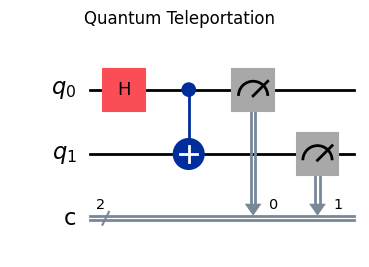

In [1]:
%matplotlib inline
import json
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit

def visualize_circuit(ir, title):
    qubits = ir["qubits"]
    instructions = ir["instructions"]

    num_qubits = len(qubits)
    classical_bits = sorted(set(c for instr in instructions if instr["op"] == "measure" for c in instr.get("classical", [])))
    
    qc = QuantumCircuit(num_qubits, len(classical_bits))
    qmap = {q: i for i, q in enumerate(qubits)}
    cmap = {c: i for i, c in enumerate(classical_bits)}

    for instr in instructions:
        op = instr["op"]
        try:
            args = instr.get("args", [])
            if op == "h":
                qc.h(qmap[args[0]])
            elif op == "x":
                qc.x(qmap[args[0]])
            elif op == "y":
                qc.y(qmap[args[0]])
            elif op == "z":
                qc.z(qmap[args[0]])
            elif op == "cx":
                qc.cx(qmap[args[0]], qmap[args[1]])
            elif op == "cy":
                qc.cy(qmap[args[0]], qmap[args[1]])
            elif op == "cz":
                qc.cz(qmap[args[0]], qmap[args[1]])
            elif op == "ccx":
                qc.ccx(qmap[args[0]], qmap[args[1]], qmap[args[2]])
            elif op == "swap":
                qc.swap(qmap[args[0]], qmap[args[1]])
            elif op == "measure":
                for q, c in zip(instr["qubits"], instr["classical"]):
                    qc.measure(qmap[q], cmap[c])
            elif op == "print":
                print("PRINT:", ", ".join(args))
            else:
                print(f"Unknown op '{op}' in instruction: {instr}")
        except Exception as e:
            print(f"Error processing {op}: {e} in {instr}")

    fig = qc.draw("mpl")
    fig.suptitle(title)
    plt.show()

if __name__ == "__main__":
    with open("teleportation_ir.json") as f:
        teleport_ir = json.load(f)

    visualize_circuit(teleport_ir, "Quantum Teleportation")
